Text Mining AOL

Group 8:
- 2502004102 - Musyaffa Ayman Rafif
- 2501987772 - Salomo Hendrian Sudjono
- 2501996505 - Grace Shirley Cam

# Resume Classification using Machine Learning Models

## 1. Setup Notebook

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from yellowbrick.model_selection import LearningCurve

In [2]:
df = pd.read_csv('data/Resume.csv')

## 2. Data Preprocessing

In [3]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
selected_columns = ['Resume_str', 'Category']
df = df[selected_columns]
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


### Data Cleaning

In [5]:
def text_cleansing(df):
    df_clean = [text.lower() for text in df]
    df_clean = [re.sub(r"\d+", "", text) for text in df_clean]
    df_clean = [re.sub(r'[^\w]', ' ', text) for text in df_clean]
    df_clean = [re.sub(r'\s+', ' ', text) for text in df_clean]
    return df_clean


In [6]:
df['Cleaned_text'] = text_cleansing(df['Resume_str'])

In [7]:
df.head()

,Resume_str,Category,Cleaned_text
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in ...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...


In [8]:
cleaned_columns = ['Cleaned_text', 'Category']
df_cleaned = df[cleaned_columns]
df_cleaned.head()

,Cleaned_text,Category
0,hr administrator marketing associate hr admin...,HR
1,hr specialist us hr operations summary versat...,HR
2,hr director summary over years experience in ...,HR
3,hr specialist summary dedicated driven and dy...,HR
4,hr manager skill highlights hr skills hr depa...,HR


In [9]:
df_cleaned.to_csv('data/Resume_clean.csv') # Save dulu

### Tokenization

In [10]:
def word_tokenize_wrapper(text):
 return word_tokenize(text)
df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(word_tokenize_wrapper)
df_cleaned.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_14984\955287719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(word_tokenize_wrapper)


,Cleaned_text,Category
0,"[hr, administrator, marketing, associate, hr, ...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, over, years, experienc...",HR
3,"[hr, specialist, summary, dedicated, driven, a...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR


### Remove Stopwords

In [11]:
list_stopwords = stopwords.words('english')

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(stopwords_removal)
df_cleaned.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_14984\2881813264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(stopwords_removal)


,Cleaned_text,Category
0,"[hr, administrator, marketing, associate, hr, ...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, years, experience, rec...",HR
3,"[hr, specialist, summary, dedicated, driven, d...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR


### Stemming

In [23]:
stemmer_ss = SnowballStemmer("english")

def stemming(tokens):
    do = []
    for w in tokens:
        dt = stemmer_ss.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    return d_clean

df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(lambda tokens: stemming(tokens))

df_cleaned.head()

,Cleaned_text,Category,Labeled_category
0,hr administr market associ hr administr summar...,HR,16
1,hr specialist us hr oper summari versatil medi...,HR,16
2,hr director summari year experi recruit plus y...,HR,16
3,hr specialist summari dedic driven dynam year ...,HR,16
4,hr manag skill highlight hr skill hr depart st...,HR,16


In [24]:
df_cleaned['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

### Label Encoding

In [14]:
label_to_numeric = {
    'INFORMATION-TECHNOLOGY': 1,
    'BUSINESS-DEVELOPMENT': 2,
    'FINANCE': 3,
    'ADVOCATE': 4,
    'ACCOUNTANT': 5,
    'ENGINEERING': 6,
    'CHEF': 7,
    'AVIATION': 8,
    'FITNESS': 9,
    'SALES': 10,
    'BANKING': 11,
    'HEALTHCARE': 12,
    'CONSULTANT': 13,
    'CONSTRUCTION': 14,
    'PUBLIC-RELATIONS': 15,
    'HR': 16,
    'DESIGNER': 17,
    'ARTS': 18,
    'TEACHER': 19,
    'APPAREL': 20,
    'DIGITAL-MEDIA': 21,
    'AGRICULTURE': 22,
    'AUTOMOBILE': 23,
    'BPO': 24
}

df_cleaned['Labeled_category'] = df_cleaned['Category'].map(label_to_numeric)

In [15]:
df_cleaned['Labeled_category'].value_counts()

Labeled_category
1     120
2     120
3     118
4     118
5     118
6     118
7     118
8     117
9     117
10    116
11    115
12    115
13    115
14    112
15    111
16    110
17    107
18    103
19    102
20     97
21     96
22     63
23     36
24     22
Name: count, dtype: int64

In [68]:
df_cleaned

,Cleaned_text,Category,Labeled_category
0,hr administr market associ hr administr summar...,HR,16
1,hr specialist us hr oper summari versatil medi...,HR,16
2,hr director summari year experi recruit plus y...,HR,16
3,hr specialist summari dedic driven dynam year ...,HR,16
4,hr manag skill highlight hr skill hr depart st...,HR,16
...,...,...,...
2479,rank sgt e non commiss offic charg brigad mail...,AVIATION,8
2480,govern relat communic organiz develop director...,AVIATION,8
2481,geek squad agent profess profil support specia...,AVIATION,8
2482,program director offic manag summari high pers...,AVIATION,8


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['Cleaned_text'], df_cleaned['Labeled_category'], test_size=0.3, random_state= 24, stratify=df_cleaned['Labeled_category'])

In [70]:
X_train

2381    aviat mainten technician profil forward think ...
938     qualiti assur associ summari enthusiast chemis...
2369    aviat maintain profess summari year experi fas...
1018    sale profess summari talent construct manag tw...
1406    execut chef summari bring culinari creativ str...
                              ...                        
2313    creativ director career focus creativ director...
305     inform technolog support specialistnetwork spe...
167     design stylist summari high achiev sale associ...
61      summari chicago hr generalist offer recruit at...
2299    eighth ninth tenth english teacher summari mot...
Name: Cleaned_text, Length: 1738, dtype: object

In [41]:
tf = TfidfVectorizer(stop_words='english', max_features=100, min_df=5) # Size Vector = 50 & Frequency kata yang dihitung minimal 3
tfidf_train_vectors = tf.fit_transform(X_train)
tfidf_test_vectors =tf.transform(X_test)

In [42]:
tf.get_feature_names_out()

array(['account', 'activ', 'administr', 'analysi', 'applic', 'assist',
       'associ', 'budget', 'busi', 'citi', 'client', 'communic',
       'compani', 'complet', 'control', 'coordin', 'creat', 'current',
       'custom', 'data', 'depart', 'design', 'develop', 'direct',
       'document', 'educ', 'effect', 'employ', 'engin', 'ensur', 'equip',
       'event', 'excel', 'execut', 'experi', 'financ', 'high',
       'implement', 'improv', 'includ', 'inform', 'intern', 'inventori',
       'issu', 'maintain', 'manag', 'market', 'materi', 'meet', 'member',
       'microsoft', 'month', 'need', 'network', 'new', 'offic', 'oper',
       'order', 'organ', 'perform', 'plan', 'polici', 'prepar', 'present',
       'problem', 'procedur', 'process', 'product', 'profess', 'program',
       'project', 'provid', 'qualiti', 'record', 'relat', 'report',
       'requir', 'research', 'resourc', 'respon', 'review', 'sale',
       'schedul', 'school', 'servic', 'skill', 'softwar', 'staff',
       'state', 'st

In [74]:
word_token = X_train.apply(word_tokenize_wrapper)
model_cbow = gensim.models.Word2Vec(word_token, min_count = 1, vector_size = 100, window = 5, sg=0)

In [77]:
model_cbow.

## 3. Exploratory Data Analysis

In [58]:
df_cleaned['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [65]:
df_cleaned

,Cleaned_text,Category,Labeled_category
0,hr administr market associ hr administr summar...,HR,16
1,hr specialist us hr oper summari versatil medi...,HR,16
2,hr director summari year experi recruit plus y...,HR,16
3,hr specialist summari dedic driven dynam year ...,HR,16
4,hr manag skill highlight hr skill hr depart st...,HR,16
...,...,...,...
2479,rank sgt e non commiss offic charg brigad mail...,AVIATION,8
2480,govern relat communic organiz develop director...,AVIATION,8
2481,geek squad agent profess profil support specia...,AVIATION,8
2482,program director offic manag summari high pers...,AVIATION,8


In [54]:
 df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cleaned_text      2484 non-null   object
 1   Category          2484 non-null   object
 2   Labeled_category  2484 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


<Axes: >

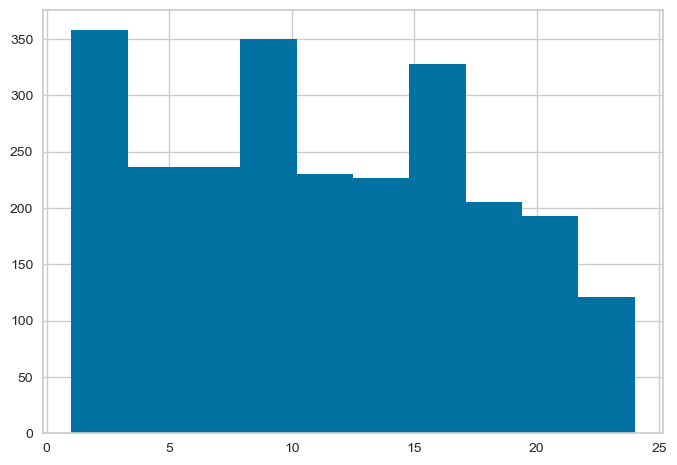

In [55]:
df_cleaned['Labeled_category'].hist()

## 4. Model Training

In [75]:
def learning_curve(model):
    cv = StratifiedKFold(n_splits=3, shuffle= True, random_state= 42)
    visualizer = LearningCurve(model, scoring='f1_weighted', cv=cv)
    visualizer.fit(model_cbow, y_train)        # Fit the data to the visualizer
    visualizer.show() 

InvalidParameterError: The 'X' parameter of learning_curve must be an array-like or a sparse matrix. Got <gensim.models.word2vec.Word2Vec object at 0x000001ACEA5DBA10> instead.

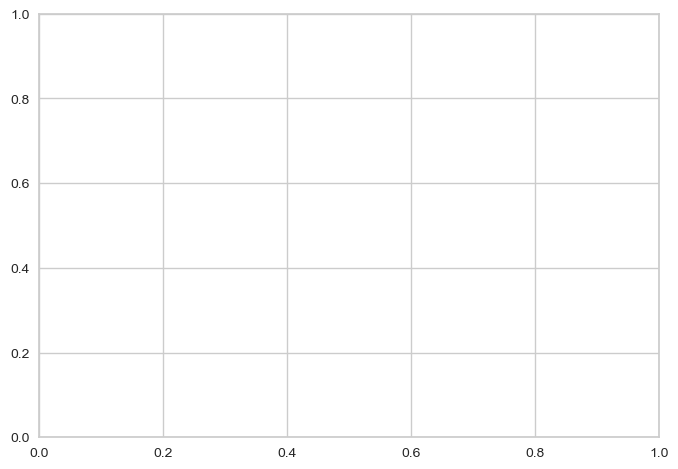

In [76]:
learning_curve(SVC())

In [ ]:
svm = SVC()
svm.fit(tfidf_train_vectors,y_train)

SVC()

In [63]:
knn = KNeighborsClassifier()
knn.fit(tfidf_train_vectors,y_train)

KNeighborsClassifier()

In [64]:
print(classification_report(knn.predict(tfidf_test_vectors),y_test))

              precision    recall  f1-score   support

           1       0.64      0.59      0.61        39
           2       0.58      0.24      0.34        87
           3       0.49      0.53      0.51        32
           4       0.37      0.22      0.28        59
           5       0.80      0.57      0.67        49
           6       0.71      0.50      0.59        50
           7       0.63      0.67      0.65        33
           8       0.26      0.31      0.28        29
           9       0.23      0.38      0.29        21
          10       0.49      0.44      0.46        39
          11       0.26      0.38      0.31        24
          12       0.23      0.40      0.29        20
          13       0.20      0.35      0.25        20
          14       0.56      0.59      0.58        32
          15       0.61      0.62      0.62        32
          16       0.82      0.64      0.72        42
          17       0.78      0.76      0.77        33
          18       0.23    

## 5. Model Evaluation